In [1]:
import os
from generator import ImageMaskGenerator

from config import (
    BATCH_SIZE, DATA_GEN_ARGS, IMAGE_COLORMODE, MASK_COLORMODE,
    PCA_COLOR_RANGE, TARGET_SIZE, SAMPLE_SIZE)

C:\Users\owner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset_dir = '../dataset'
customGen = ImageMaskGenerator(batch_size=2,
                               dataset_dir=dataset_dir,
                               folder='train',
                               aug_dict=DATA_GEN_ARGS,
                               image_colormode=IMAGE_COLORMODE,
                               mask_colormode=MASK_COLORMODE,
                               target_size=TARGET_SIZE,
                               sample_size=SAMPLE_SIZE,
                               shuffle=True)

In [3]:
images, masks = customGen.__next__()

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def show(image):
    image = Image.fromarray(image.reshape(256,256)*255)
    image = image.convert('RGB')
    return image

def show2(image):
    image = Image.fromarray(np.uint8(image))
    return image

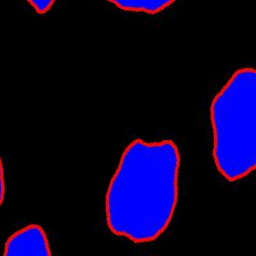

In [11]:
mask = masks[1]*255
show2(mask)

In [104]:
image22 = np.array(show(image2))
image3 = pca_color_augmentation_rgb(image22)


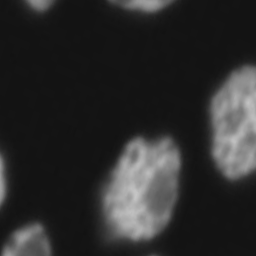

In [16]:
show(images[1])

In [13]:
(256,256) + (1,)

(256, 256, 1)

In [63]:
def pca_color_augmentation_L(image_array_input):
    """
        RGBカラー画像限定
        コピぺ：https://qiita.com/koshian2/items/78de8ccd09dd2998ddfc
    """

    img = image_array_input.reshape(-1, 1).astype(np.float32)
    # 分散を計算
    ch_var = np.var(img, axis=0)
    # 分散の合計が3になるようにスケーリング
    scaling_factor = np.sqrt(1 / sum(ch_var))
    # 平均で引いてスケーリング
    img = (img - np.mean(img, axis=0)) * scaling_factor

    cov = np.cov(img, rowvar=False)
    lambd_eigen_value, p_eigen_vector = np.linalg.eig(cov)

    while True:
        rand = np.random.randn(1) * 0.1
        if np.all(rand > PCA_COLOR_RANGE[0]):
            if np.all(rand < PCA_COLOR_RANGE[1]):
                break

    delta = np.dot(p_eigen_vector, rand*lambd_eigen_value)
    delta = (delta * 255.0).astype(np.int32)[np.newaxis, np.newaxis, :]

    img_out = np.clip(image_array_input + delta, 0, 255).astype(np.uint8)
    return img_out




def pca_color_augmentation_rgb(image_array_input):
    """
        RGBカラー画像限定
        コピぺ：https://qiita.com/koshian2/items/78de8ccd09dd2998ddfc
    """

    img = image_array_input.reshape(-1, 3).astype(np.float32)
    # 分散を計算
    ch_var = np.var(img, axis=0)
    # 分散の合計が3になるようにスケーリング
    scaling_factor = np.sqrt(3.0 / sum(ch_var))
    # 平均で引いてスケーリング
    img = (img - np.mean(img, axis=0)) * scaling_factor

    cov = np.cov(img, rowvar=False)
    lambd_eigen_value, p_eigen_vector = np.linalg.eig(cov)

    while True:
        rand = np.random.randn(3) * 0.1
        if np.all(rand > PCA_COLOR_RANGE[0]):
            if np.all(rand < PCA_COLOR_RANGE[1]):
                break

    delta = np.dot(p_eigen_vector, rand*lambd_eigen_value)
    delta = (delta * 255.0).astype(np.int32)[np.newaxis, np.newaxis, :]

    img_out = np.clip(image_array_input + delta, 0, 255).astype(np.uint8)
    return img_out


In [49]:
image.shape

(768, 768, 1)

In [45]:
import numpy as np
import matplotlib.pyplot as plt